<a href="https://colab.research.google.com/github/datascience1223/Data-Science_Projects/blob/main/Covid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis And Visualization Project with Covid_19 Dataset**

In [ ]:
# importing libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Loading/Cleaning

In [ ]:
# load dataset using pandas
df = pd.read_csv('/content/Covid Live.csv')

In [ ]:
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [ ]:
# drop '#' column beacuse it has nothing except numbers.
df.drop("#", axis=1, inplace=True)

In [ ]:
# getting list of all columns
columns= df.columns.tolist()  # check list of columns
columns

['Country,\nOther',
 'Total\nCases',
 'Total\nDeaths',
 'New\nDeaths',
 'Total\nRecovered',
 'Active\nCases',
 'Serious,\nCritical',
 'Tot Cases/\n1M pop',
 'Deaths/\n1M pop',
 'Total\nTests',
 'Tests/\n1M pop',
 'Population']

In [ ]:
# Rename columns because there is little confusion
columns[0]="Country"
columns[1]="Total Cases"
columns[2]="Total Deaths"
columns[3]= "New Deaths"
columns[4]="Total Recovered"
columns[5]="Active Cases"
columns[6]="Serious Cases"
columns[7]="Total Cases/1M pop"
columns[8]="Deaths/1M pop"
columns[9]="Total Tests"
columns[10]="Test/1M pop"
df.columns=columns


In [ ]:
# check dataset again
df.head()

,Country,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Test/1M pop,Population
0,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [ ]:
# check the info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             230 non-null    object 
 1   Total Cases         230 non-null    object 
 2   Total Deaths        225 non-null    object 
 3   New Deaths          3 non-null      float64
 4   Total Recovered     214 non-null    object 
 5   Active Cases        215 non-null    object 
 6   Serious Cases       147 non-null    object 
 7   Total Cases/1M pop  228 non-null    object 
 8   Deaths/1M pop       223 non-null    object 
 9   Total Tests         214 non-null    object 
 10  Test/1M pop         214 non-null    object 
 11  Population          228 non-null    object 
dtypes: float64(1), object(11)
memory usage: 21.7+ KB


# Obervations
## We've total 230 rows and 12 columns.

## We've 11 columns in object Dtype, and 1 coloumn-> New Deaths is in float64.

## But, upon viewing the dataset the values are numbers which means the dtype is wrong. Only the Country column is an object dtype.
## Upon see the Non-Null Count it seems like we've null/missing values in the data.

In [ ]:
# Lets convert the columns of string datatype into float datatype

df["Total Cases"] = df["Total Cases"].str.replace(",","").astype(float)
df["Total Deaths"] = df["Total Deaths"].str.replace(",","").astype(float)
df["Total Recovered"] = df["Total Recovered"].str.replace(",","").astype(float)
df["Active Cases"] = df["Active Cases"].str.replace(",","").astype(float)
df["Serious Cases"] = df["Serious Cases"].str.replace(",","").astype(float)
df["Total Cases/1M pop"] = df["Total Cases/1M pop"].str.replace(",","").astype(float)
df["Deaths/1M pop"] = df["Deaths/1M pop"].str.replace(",","").astype(float)
df["Total Tests"] = df["Total Tests"].str.replace(",","").astype(float)
df["Test/1M pop"] = df["Test/1M pop"].str.replace(",","").astype(float)
df["Population"] = df["Population"].str.replace(",","").astype(float)

# check Null/Missing Values

In [ ]:
df.isnull().sum()

Country                 0
Total Cases             0
Total Deaths            5
New Deaths            227
Total Recovered        16
Active Cases           15
Serious Cases          83
Total Cases/1M pop      2
Deaths/1M pop           7
Total Tests            16
Test/1M pop            16
Population              2
dtype: int64

In [ ]:
df.isnull().sum() * 100 / len(df) #checking for null values in percentage

Country                0.000000
Total Cases            0.000000
Total Deaths           2.173913
New Deaths            98.695652
Total Recovered        6.956522
Active Cases           6.521739
Serious Cases         36.086957
Total Cases/1M pop     0.869565
Deaths/1M pop          3.043478
Total Tests            6.956522
Test/1M pop            6.956522
Population             0.869565
dtype: float64

<Axes: >

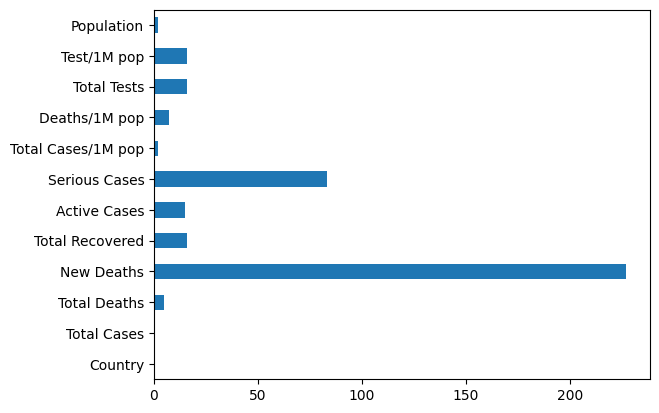

In [ ]:
# visualization of Null values using bar plot
df.isnull().sum().plot(kind='barh')   # create a bar chart for null/missing values

# Observation
## Following coloumns contains Null/Missing Values
## Total Deaths, New Deaths, Total Recovered, Active Cases, Serious Cases, Total Cases/1M pop, Deaths/1M pop , Total Tests, Test/1M pop , Population

# Handling Missing values

In [ ]:
#The New Deaths column contains all the null values 98.695652. So, we can either remove this column or change the null with 0 which means NO NEW DEAHTS. I'll go with filling with 0
# fill the column with 0 values
df['New Deaths'] = df['New Deaths'].fillna(0)

## We'll use the SimpleImputer is used to handle missing values:
## A SimpleImputer is a class in scikit-learn, which is a popular machine learning library in Python, used for handling missing values in datasets. It provides a simple strategy for imputing (filling in) missing values with either constant values or statistical measures.

In [ ]:
from sklearn.impute import SimpleImputer # Import SimpleImputer

In [ ]:
imputer= SimpleImputer(missing_values=np.nan, strategy="median",fill_value=None) # Imputer Initialization

# Imputation on each column
df["Total Deaths"] = imputer.fit_transform(df[["Total Deaths"]])
df["Total Recovered"] = imputer.fit_transform(df[["Total Recovered"]])
df["Active Cases"] = imputer.fit_transform(df[["Active Cases"]])
df["Serious Cases"] = imputer.fit_transform(df[["Serious Cases"]])
df["Deaths/1M pop"] = imputer.fit_transform(df[["Deaths/1M pop"]])
df["Total Tests"] = imputer.fit_transform(df[["Total Tests"]])
df["Total Cases/1M pop"] = imputer.fit_transform(df[["Total Cases/1M pop"]])
df["Test/1M pop"] = imputer.fit_transform(df[["Test/1M pop"]])
df["Population"]= imputer.fit_transform(df[["Population"]])

In [ ]:
# Checkking for null values

df.isnull().sum()

Country               0
Total Cases           0
Total Deaths          0
New Deaths            0
Total Recovered       0
Active Cases          0
Serious Cases         0
Total Cases/1M pop    0
Deaths/1M pop         0
Total Tests           0
Test/1M pop           0
Population            0
dtype: int64

# check for Dupplicated values

In [ ]:
df.duplicated().sum()

0

# **Descriptive** **Statistics**

In [ ]:
df.describe()

,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Test/1M pop,Population
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.705969e+06,2.851300e+04,0.234783,2.627620e+06,5.378354e+04,179.204348,179085.795652,1185.156522,2.933894e+07,1.968860e+06,3.459377e+07
std,8.779899e+06,1.011682e+05,2.835614,8.527212e+06,2.009570e+05,746.681337,181664.951320,1229.921910,1.106360e+08,3.379768e+06,1.383417e+08
min,9.000000e+00,1.000000e+00,0.000000,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,2.364900e+04,2.160000e+02,0.000000,2.449950e+04,1.700000e+02,10.000000,17017.500000,174.250000,4.007550e+05,1.968250e+05,5.476582e+05
50%,2.037110e+05,2.179000e+03,0.000000,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,1.256286e+06,1.327200e+04,0.000000,1.214962e+06,1.827425e+04,34.500000,292559.750000,1896.750000,1.130354e+07,2.072495e+06,2.197109e+07
max,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


# Observation
  Total Cases:\ ↪ Average: 2.7 million ↪ Minimum: 9 cases  Maximum: 98.2 million

↪ Total Deaths:\ ↪ Average: 28,513 deaths ↪ Minimum: 1 death ↪ Maximum: 1,084,282 deaths

↪ New Deaths:\ ↪ Average: 0.23 ↪ Minimum: 0 ↪ Maximum: 42

↪ Total Recovered:\ ↪ Average: 2.6 million ↪ Minimum: 2 cases ↪ Maximum: 94.9 million

↪ Active Cases:\ ↪ Average: 53,784 cases ↪ Minimum: 0 cases ↪ Maximum: 2.1 million

↪ Serious Cases:\ ↪ Average: 179 ↪ Minimum: 1 case ↪ Maximum: 8,318 cases

↪ Total Cases/1M pop:\ ↪ Average: 179,086 ↪ Minimum: 16 ↪ Maximum: 703,959

↪ Deaths/1M pop:\ ↪ Average: 1,185 ↪ Minimum: 2 ↪ Maximum: 6,429

↪ Total Tests:\ ↪ Average: 29.3 million ↪ Minimum: 5,117 ↪ Maximum: 1.1 billion

↪ Test/1M pop:\ ↪ Average: 1.97 million ↪ Minimum: 5,091 ↪ Maximum: 22 million

↪ Population:\ ↪ Average: 34.6 million ↪ Minimum: 799 ↪ Maximum: 1.4 billion

# check **correlation**

In [ ]:
# Drop the 'Country' column
df_corr = df.drop(columns='Country')   # beacuse it is object type

In [ ]:
corr_matrix = df_corr.corr()

fig = px.imshow(corr_matrix)
fig = px.imshow(corr_matrix, color_continuous_scale='Viridis')
fig.show()

# EDA-**Exploratory Data Analysis**

In [ ]:
df.head()

,Country,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Test/1M pop,Population
0,USA,98166904.0,1084282.0,0.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,India,44587307.0,528629.0,0.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,France,35342950.0,155078.0,0.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,Brazil,34706757.0,686027.0,0.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,Germany,33312373.0,149948.0,0.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


# How many countries in dataset?

In [ ]:
df['Country'].value_counts().sum()

230

In [ ]:
df['Country'].nunique()  # number of unique values

230

In [ ]:
df['Total Cases'].sum()

622372853.0

# Distribution of Deaths

In [ ]:
df['Total Deaths'].sum()

6557990.0

In [ ]:
# check the distribution of deaths
fig = px.histogram(df, x='Total Deaths', title="Distribution of Total Deaths")
fig.show()

# obervation
## The total number of deaths recorded in the dataset is approximately 6.6 million

In [ ]:
# Distribution of total cases
fig = px.histogram(df, x='Total Cases', title="Distribution of Total Cases")
fig.show()

# observation
## The sum of the 'Total Cases' column in the DataFrame df is approximately 622.4 million

In [ ]:
#  total Recovered
df['Total Recovered'].sum()


604352691.0

In [ ]:
# Distribution of total Recovered
fig = px.histogram(df, x='Total Cases', title="Distribution of Total Cases")
fig.show()

# observation
## The sum of the 'Total Recovered' column in the DataFrame df is approximately 604.4 million

In [ ]:
# Active cases
df['Active Cases'].sum()

12370214.0

In [ ]:
# Distribution of Active cases
fig = px.histogram(df, x='Active Cases', title="Distribution of Active Cases")
fig.show()


In [ ]:
# Serious Cases
df['Serious Cases'].sum()

41217.0

In [ ]:
# Distribution of Serious cases
fig = px.histogram(df, x='Serious Cases', title="Distribution of Serious Cases")
fig.show()

# **Total Cases vs Total Recovered**

In [ ]:
# plot total cases vs total recovered
fig = px.scatter(df, x='Total Cases', y='Total Recovered', title="Total Cases vs Total Recovered", color_continuous_scale='Viridis', color='Total Recovered')
fig.show()

# observation
## The graph shows that the total number of recovered cases from COVID-19 has now exceeded the total number of cases. This is a positive sign, as it means that more people are recovering from the virus than are becoming infected.

# **Total Cases VS Total Deaths?**

In [ ]:
# plot total cases vs total deaths
fig = px.scatter(df, x='Total Cases', y='Total Deaths', title="Total Cases vs Total Deaths", color_continuous_scale='Viridis', color='Total Deaths')
fig.show()

# observation
## The graph shows that the total number of deaths has increased steadily with the total number of cases, but at a slower rate. This means that the death rate from COVID-19 has been decreasing over time.

# **Total Cases VS Actice Cases?**

In [ ]:
# plot total cases vs active cases
fig = px.scatter(df, x='Total Cases', y='Active Cases', title="Total Cases vs Active Cases", color_continuous_scale='Viridis', color='Active Cases')
fig.show()

# observation
## Active cases tend to increase as total cases increase.
## However, the relationship is not linear, meaning that the rate of increase in active cases is not directly proportional to the rate of increase in total cases.

# **Active Cases VS Serious One?**

In [ ]:
# serious cases amoung the active cases
df.groupby('Active Cases')['Serious Cases'].sum()

Active Cases
0.0           144.0
3.0            28.0
4.0            18.0
5.0            40.0
10.0            1.0
              ...  
804449.0      204.0
836193.0     3086.0
843821.0      106.0
847225.0     1406.0
2120510.0    2970.0
Name: Serious Cases, Length: 196, dtype: float64

In [ ]:
# plot active cases vs serious cases
fig = px.scatter(df, x='Active Cases', y='Serious Cases', title="Active Cases vs Serious Cases", color_continuous_scale='Viridis', color='Serious Cases')
fig.show()

# observation
## Active cases are positively correlated with serious cases, meaning that as active cases increase, serious cases also tend to increase.

# Country population and Total Cases

In [ ]:
# plot the countries with population along with their total cases
import plotly.graph_objects as go

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],  # Country names
    locationmode='country names',
    z=df['Total Cases'],  # Total cases data
    text=df['Population'],  # Population data
    colorscale='Viridis',
    autocolorscale=False,
    marker_line_color='white',  # Marker line color
    colorbar_title='Total Cases'  # Colorbar title
))
# Set the layout
fig.update_layout(
    title_text='Total Cases and Population by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Show the plot
fig.show()

# Country population and Serious Cases

In [ ]:
# plot the countries with population along with their serious cases
import plotly.graph_objects as go

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],  # Country names
    locationmode='country names',
    z=df['Serious Cases'],  # Total cases data
    text=df['Population'],  # Population data
    colorscale='Spectral',
    autocolorscale=False,
    marker_line_color='white',  # Marker line color
    colorbar_title='Serious Cases'  # Colorbar title
))
# Set the layout
fig.update_layout(
    title_text='Serious Cases and Population by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Show the plot
fig.show()

# country population and Active cases

In [ ]:
# plot the countries with population along with their Active Cases
import plotly.graph_objects as go

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],  # Country names
    locationmode='country names',
    z=df['Active Cases'],  # Total cases data
    text=df['Population'],  # Population data
    colorscale='spectral',
    autocolorscale=False,
    marker_line_color='white',  # Marker line color
    colorbar_title='Active Cases'  # Colorbar title
))
# Set the layout
fig.update_layout(
    title_text='Active Cases and Population by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Show the plot
fig.show()

# population vs Test

In [ ]:
# total Population vs Total Test
fig = px.scatter(df, x='Population', y='Total Tests', title="Total Population vs Total Tests", color_continuous_scale='Viridis', color='Total Tests')
fig.show()


# observation
## Total tests tend to increase as total population increases, but the relationship is not linear. This means that while countries with larger populations tend to conduct more tests, the rate of increase in testing is not directly proportional to the rate of increase in population.
